In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import random
import time

In [2]:
def add_mags(m1, m2):
    return -2.5 * np.log10(10**(-m1/2.5) + 10**(-m2/2.5))

In [3]:
tde_data = pickle.load(open('tdes.pickle', 'rb'))
tde_sim = pd.read_csv('all_tdes2.csv', index_col=0)

tde_sim.replace(-1.0000000150474662e+30, np.nan, inplace=True)

In [4]:
tde_gal_data = [{}, {}]
for key, val in tde_data.items():
    tde_gal_data[key % 2][key - (key % 2)] = val

res_drop = ['multiple_matches', 'pix_sub-pix_pos', 'offset', 'ac_offset', 'al_offset', 'theta', 'ra', 'dec']
gal_drop = ['ra', 'dec']

simulated_data = {}
for i, j in tde_sim.iloc[::2].iterrows():
    temp_gal_dic = tde_gal_data[0][i]['data']
    for key in gal_drop:
        temp_gal_dic.pop(key)
    temp_gal_dic_in = {'in %s' % key: temp_gal_dic[key] for key in temp_gal_dic.keys()}

    temp_tde_dic = tde_gal_data[1][i]['data']
    temp_tde_dic_in = {'in %s' % key: temp_tde_dic[key] for key in temp_tde_dic.keys()}

    temp_res_dic = j.to_dict()
    for key in res_drop:
        temp_res_dic.pop(key)
    temp_res_dic_out = {'out %s' % key: temp_res_dic[key] for key in temp_res_dic.keys()}

    simulated_data[i] = {**temp_gal_dic_in, **temp_tde_dic_in, **temp_res_dic_out, 'tde source_g_mag': tde_sim.get_value(i + 1, 'source_g_mag')}

tdedf = pd.DataFrame.from_dict(simulated_data, orient='index')

tdedf.rename(columns={'out source_g_mag': 'galaxy source_g_mag'}, inplace=True)
tdedf['total source_g_mag'] = tdedf.apply(lambda row: add_mags(row['tde source_g_mag'], row['galaxy source_g_mag']), axis=1)

tdedf_detected = tdedf.dropna()

In [5]:
tdedf

,tde source_g_mag,in dec,in galaxy radius,in ra,in galaxy mag,out found_mag,in snapshot mag,galaxy source_g_mag,in peak mag,in point time,total source_g_mag
0,27.000000,-500,0.5,-1600,16,NaN,27.000000,15.599000,14,-37.0,15.598970
2,27.000000,0,0.5,-1600,16,16.125000,27.000000,15.599000,14,-36.0,15.598970
4,27.000000,500,0.5,-1600,16,16.125000,27.000000,15.599000,14,-35.0,15.598970
6,27.000000,-500,0.5,-1400,16,16.156250,27.000000,15.599000,14,-34.0,15.598970
8,27.000000,0,0.5,-1400,16,16.140625,27.000000,15.599000,14,-33.0,15.598970
10,27.000000,500,0.5,-1400,16,16.109375,27.000000,15.599000,14,-32.0,15.598970
12,27.000000,-500,0.5,-1200,16,16.140625,27.000000,15.599000,14,-31.0,15.598970
14,27.000000,0,0.5,-1200,16,16.140625,27.000000,15.599000,14,-30.0,15.598970
16,27.000000,500,0.5,-1200,16,16.125000,27.000000,15.599000,14,-29.0,15.598970
18,27.000000,-500,0.5,-1000,16,16.125000,27.000000,15.599000,14,-28.0,15.598970


In [52]:
cadence = [37, 26, 15]
lc = []
tdedf['light curve'] = 0

for gm in tdedf['in galaxy mag'].unique():
    for gr in tdedf['in galaxy radius'].unique():
        for pm in tdedf['in peak mag'].unique():
            df = tdedf.loc[tdedf['in galaxy mag'] == gm].loc[tdedf['in galaxy radius'] == gr].loc[tdedf['in peak mag'] == pm]
            for cad in cadence:
                for p in range(cad):
                    lidx = [p + i * cad for i in range(len(df) // cad)]
                    lc.append(df.iloc[lidx])

In [53]:
lc[0]

,tde source_g_mag,in dec,in galaxy radius,in ra,in galaxy mag,out found_mag,in snapshot mag,galaxy source_g_mag,in peak mag,in point time,total source_g_mag,light curve
0,27.000000,-500,0.5,-1600,16,NaN,27.000000,15.599,14,-37.0,15.598970,0
74,27.000000,0,0.5,800,16,16.093750,27.000000,15.599,14,0.0,15.598970,0
148,14.626000,500,0.5,-600,16,14.453125,14.625893,15.599,14,37.0,14.254392,0
222,15.829000,-500,0.5,2000,16,15.281250,15.828553,15.599,14,74.0,14.955346,0
296,16.559000,0,0.5,600,16,15.593750,16.559417,15.599,14,111.0,15.223608,0
370,17.079000,500,0.5,-800,16,15.765625,17.079477,15.599,14,148.0,15.351648,0
444,17.483000,-500,0.5,1800,16,15.890625,17.483087,15.599,14,185.0,15.422649,0
518,17.813000,0,0.5,400,16,15.906250,17.812902,15.599,14,222.0,15.466172,0
592,18.091999,500,0.5,-1000,16,15.953125,18.091760,15.599,14,259.0,15.494880,0
666,18.333000,-500,0.5,1600,16,16.031250,18.333309,15.599,14,296.0,15.514825,0


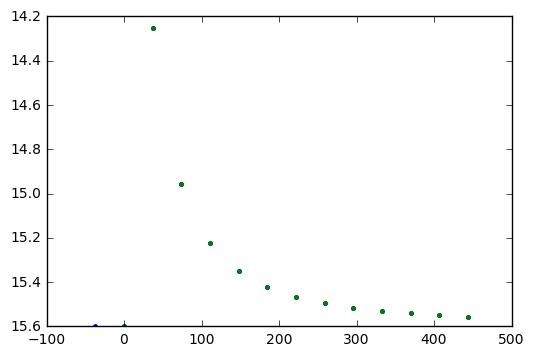

In [56]:
for i in lc[0:1]:
    df_det = i.dropna()
    plt.plot(i['in point time'], i['total source_g_mag'], '.')
    plt.plot(df_det['in point time'], df_det['total source_g_mag'], '.')
    plt.gca().invert_yaxis()